In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kdmkankshexrandom/tStates2_07.dat
/kaggle/input/kdmkankshexrandom/States7_12.dat
/kaggle/input/kdmkankshexrandom/tStates5_06.dat
/kaggle/input/kdmkankshexrandom/States4_09.dat
/kaggle/input/kdmkankshexrandom/States7_09.dat
/kaggle/input/kdmkankshexrandom/States6_09.dat
/kaggle/input/kdmkankshexrandom/States5_07.dat
/kaggle/input/kdmkankshexrandom/States6_02.dat
/kaggle/input/kdmkankshexrandom/States2_01.dat
/kaggle/input/kdmkankshexrandom/States1_11.dat
/kaggle/input/kdmkankshexrandom/States4_00.dat
/kaggle/input/kdmkankshexrandom/States4_08.dat
/kaggle/input/kdmkankshexrandom/States4_10.dat
/kaggle/input/kdmkankshexrandom/States2_05.dat
/kaggle/input/kdmkankshexrandom/States2_09.dat
/kaggle/input/kdmkankshexrandom/States4_05.dat
/kaggle/input/kdmkankshexrandom/States2_03.dat
/kaggle/input/kdmkankshexrandom/States7_01.dat
/kaggle/input/kdmkankshexrandom/States4_07.dat
/kaggle/input/kdmkankshexrandom/States2_07.dat
/kaggle/input/kdmkankshexrandom/States5_10.dat
/kaggle/inp

In [2]:
!pip install umap-learn --q
from google.colab import drive
#from matplotlib.projections.polar import mspines
from IPython.core.display import Image
import matplotlib
from pylab import *
import pylab as pl
import cv2
from google.colab.patches import cv2_imshow
import os
import glob
import  math
import numpy as np
import itertools

In [4]:
folder1='/kaggle/input/spinerstestdataset/Sample.dat'
folder2='/kaggle/input/kdmkankshexrandom'

In [5]:
def find_dat_files(folder2_path):
    # Use glob to find all .dat files in the folder
    dat_files = glob.glob(os.path.join(folder2_path, '*.dat'))
    return dat_files

In [6]:
dat_files = find_dat_files(folder2)

In [7]:
# Filtrar elementos que no contienen "Sample.dat"
dat_files = [s for s in dat_files if "Sample.dat" not in s] # States1_02.dat
#dat_files = [s for s in dat_files if "States1_02.dat" not in s]

In [8]:
len(dat_files)

91

In [9]:
import numpy as np
import itertools
import math

In [10]:
def generateImage(select_file, sample_file):
    ##############################################
    ### LEEMOS EL TAMAÑO SEGÚN EL ARCHIVO A LEER #
    ##############################################
    with open(select_file) as f_input:
        par = np.loadtxt(itertools.islice(f_input, 0, 1))
    Lenght, rdmax = int(par[1]), int(par[2])

    ##############################################
    ### LEEMOS EL ARCHIVO DE MUESTRAS ###########
    ##############################################
    # Leer archivo de muestra en una sola llamada
    r = np.loadtxt(sample_file, usecols=(1, 2, 3))
    No_Atoms = len(r)
    No_Atoms_Level = No_Atoms // Lenght

    # Leer las primeras filas necesarias en el archivo de muestra
    ri = np.loadtxt(sample_file, max_rows=No_Atoms_Level, usecols=(0, 1))
    ri += rdmax

    ################################################################################
    ## FUNCIÓN PARA OBTENER LAS IMÁGENES Y ASOCIARLAS A LOS PARÁMETROS REQUERIDOS ##
    ################################################################################
    # Leer todo el archivo select_file de una vez
    with open(select_file) as f_input:
        all_lines = f_input.readlines()

    # Calcular el número de líneas necesarias
    Int_temp = len(all_lines) / (No_Atoms + 1)
    No_lineas = math.trunc(Int_temp)

    # Inicializar listas para los parámetros
    parameters = np.zeros((No_lineas, 15))  # 15 columnas para los parámetros
    MS = np.zeros((No_lineas, (rdmax * 2) + 3, (rdmax * 2) + 3))

    # Procesar los parámetros y Sz
    for n in range(No_lineas):
        # Leer los parámetros en una sola línea
        i = n * No_Atoms + n
        par = np.array(all_lines[i].split(), dtype=float)
        parameters[n] = par

        # Leer las líneas correspondientes a Sz
        start_idx = i + 1
        end_idx = start_idx + No_Atoms_Level
        si = np.loadtxt(all_lines[start_idx:end_idx], dtype=float)
        Sz = si[:, 2]

        # Actualizar la matriz MS con los valores de Sz
        for ii in range(No_Atoms_Level):
            a, b = int(ri[ii, 0] + 1), int(ri[ii, 1] + 1)
            MS[n, a, b] = Sz[ii]

    # Separar parámetros individuales
    Nest, L, rd, So, T, Jex, Jex2, Jex3, Jex4, Kan1, Kan2, KanS, Hex, kd, KDM = parameters.T

    # Expandir dimensiones de MS para el formato requerido
    MS = np.expand_dims(MS, axis=-1)

    return MS, Nest, L, rd, So, T, Jex, Jex2, Jex3, Jex4, Kan1, Kan2, KanS, Hex, kd, KDM

In [11]:
for i in range(len(dat_files)):
  try: 
      sample_file = folder1
      select_file = dat_files[i]
      print(select_file)
      MS_,Nest_,L_,rd_,So_,T_,Jex_,Jex2_,Jex3_,Jex4_,Kan1_,Kan2_,KanS_,Hex_,kd_,KDM_ = generateImage(select_file,sample_file)
      if i==0:
        MS =  MS_
        Nest = Nest_
        L = L_
        rd = rd_
        So = So_
        T = T_
        Jex =  Jex_
        Jex2 =  Jex2_
        Jex3 =  Jex3_
        Jex4 =  Jex4_
        Kan1 = Kan1_
        KanS =  KanS_
        Hex =  Hex_
        kd = kd_
        KDM =  KDM_
      else:
        MS = np.r_[MS,MS_]
        Nest = np.r_[Nest,Nest_]
        L = np.r_[L,L_]
        rd = np.r_[rd,rd_]
        So = np.r_[So,So_]
        T = np.r_[T,T_]
        Jex =  np.r_[Jex,Jex_]
        Jex2 =  np.r_[Jex2,Jex2_]
        Jex3 = np.r_[Jex3,Jex3_]
        Jex4 = np.r_[Jex4,Jex4_]
        Kan1 = np.r_[Kan1,Kan1_]
        KanS =  np.r_[KanS,KanS_]
        Hex =  np.r_[Hex,Hex_]
        kd = np.r_[kd,kd_]
        KDM =  np.r_[KDM,KDM_]

  except Exception:
        print("ERRORFILE: ",dat_files[i])


/kaggle/input/kdmkankshexrandom/tStates2_07.dat
/kaggle/input/kdmkankshexrandom/States7_12.dat
/kaggle/input/kdmkankshexrandom/tStates5_06.dat
/kaggle/input/kdmkankshexrandom/States4_09.dat
/kaggle/input/kdmkankshexrandom/States7_09.dat
/kaggle/input/kdmkankshexrandom/States6_09.dat
/kaggle/input/kdmkankshexrandom/States5_07.dat
/kaggle/input/kdmkankshexrandom/States6_02.dat
/kaggle/input/kdmkankshexrandom/States2_01.dat
/kaggle/input/kdmkankshexrandom/States1_11.dat
/kaggle/input/kdmkankshexrandom/States4_00.dat
/kaggle/input/kdmkankshexrandom/States4_08.dat
/kaggle/input/kdmkankshexrandom/States4_10.dat
/kaggle/input/kdmkankshexrandom/States2_05.dat
/kaggle/input/kdmkankshexrandom/States2_09.dat
/kaggle/input/kdmkankshexrandom/States4_05.dat
/kaggle/input/kdmkankshexrandom/States2_03.dat
/kaggle/input/kdmkankshexrandom/States7_01.dat
/kaggle/input/kdmkankshexrandom/States4_07.dat
/kaggle/input/kdmkankshexrandom/States2_07.dat
/kaggle/input/kdmkankshexrandom/States5_10.dat
/kaggle/inp

/tmp/ipykernel_35/2106010101.py:6: UserWarning: loadtxt: input contained no data: "<itertools.islice object at 0x7d3d784c03b0>"
  par = np.loadtxt(itertools.islice(f_input, 0, 1))


/kaggle/input/kdmkankshexrandom/States9_00.dat
/kaggle/input/kdmkankshexrandom/States6_10.dat
/kaggle/input/kdmkankshexrandom/States2_02.dat
/kaggle/input/kdmkankshexrandom/States1_00.dat
/kaggle/input/kdmkankshexrandom/States7_11.dat
/kaggle/input/kdmkankshexrandom/States9_02.dat
/kaggle/input/kdmkankshexrandom/States7_04.dat
/kaggle/input/kdmkankshexrandom/States4_11.dat
/kaggle/input/kdmkankshexrandom/tStates7_08.dat
ERRORFILE:  /kaggle/input/kdmkankshexrandom/tStates7_08.dat
/kaggle/input/kdmkankshexrandom/States7_10.dat


/tmp/ipykernel_35/2106010101.py:6: UserWarning: loadtxt: input contained no data: "<itertools.islice object at 0x7d3d85dfa200>"
  par = np.loadtxt(itertools.islice(f_input, 0, 1))


/kaggle/input/kdmkankshexrandom/tStates4_06.dat
/kaggle/input/kdmkankshexrandom/tStates5_08.dat
ERRORFILE:  /kaggle/input/kdmkankshexrandom/tStates5_08.dat
/kaggle/input/kdmkankshexrandom/States6_11.dat


/tmp/ipykernel_35/2106010101.py:6: UserWarning: loadtxt: input contained no data: "<itertools.islice object at 0x7d3d784c0e50>"
  par = np.loadtxt(itertools.islice(f_input, 0, 1))


/kaggle/input/kdmkankshexrandom/States1_03.dat
/kaggle/input/kdmkankshexrandom/States2_10.dat
/kaggle/input/kdmkankshexrandom/States1_09.dat
/kaggle/input/kdmkankshexrandom/States7_05.dat
/kaggle/input/kdmkankshexrandom/tStates7_06.dat
/kaggle/input/kdmkankshexrandom/tStates5_07.dat
/kaggle/input/kdmkankshexrandom/States5_08.dat
/kaggle/input/kdmkankshexrandom/tStates1_08.dat
ERRORFILE:  /kaggle/input/kdmkankshexrandom/tStates1_08.dat
/kaggle/input/kdmkankshexrandom/tStates6_06.dat


/tmp/ipykernel_35/2106010101.py:6: UserWarning: loadtxt: input contained no data: "<itertools.islice object at 0x7d3d784c2200>"
  par = np.loadtxt(itertools.islice(f_input, 0, 1))


/kaggle/input/kdmkankshexrandom/States6_05.dat
/kaggle/input/kdmkankshexrandom/States7_08.dat
/kaggle/input/kdmkankshexrandom/States1_02.dat
/kaggle/input/kdmkankshexrandom/tStates1_05.dat
/kaggle/input/kdmkankshexrandom/States5_02.dat
/kaggle/input/kdmkankshexrandom/tStates4_08.dat
ERRORFILE:  /kaggle/input/kdmkankshexrandom/tStates4_08.dat
/kaggle/input/kdmkankshexrandom/States6_01.dat


/tmp/ipykernel_35/2106010101.py:6: UserWarning: loadtxt: input contained no data: "<itertools.islice object at 0x7d3d85d91a30>"
  par = np.loadtxt(itertools.islice(f_input, 0, 1))


/kaggle/input/kdmkankshexrandom/States4_03.dat
/kaggle/input/kdmkankshexrandom/States5_09.dat
/kaggle/input/kdmkankshexrandom/States5_12.dat
/kaggle/input/kdmkankshexrandom/States2_00.dat
/kaggle/input/kdmkankshexrandom/States2_11.dat
/kaggle/input/kdmkankshexrandom/States5_11.dat
/kaggle/input/kdmkankshexrandom/tStates9_06.dat
/kaggle/input/kdmkankshexrandom/States1_08.dat
/kaggle/input/kdmkankshexrandom/States6_04.dat
/kaggle/input/kdmkankshexrandom/tStates2_06.dat
/kaggle/input/kdmkankshexrandom/States9_01.dat
/kaggle/input/kdmkankshexrandom/States5_03.dat
/kaggle/input/kdmkankshexrandom/States4_06.dat
/kaggle/input/kdmkankshexrandom/States6_07.dat
/kaggle/input/kdmkankshexrandom/tStates1_07.dat
/kaggle/input/kdmkankshexrandom/States1_12.dat
/kaggle/input/kdmkankshexrandom/States6_06.dat
/kaggle/input/kdmkankshexrandom/States5_01.dat
/kaggle/input/kdmkankshexrandom/States7_02.dat
/kaggle/input/kdmkankshexrandom/States7_03.dat
/kaggle/input/kdmkankshexrandom/tStates9_08.dat
/kaggle/i

In [19]:
MS.shape

(164212, 39, 39, 1)

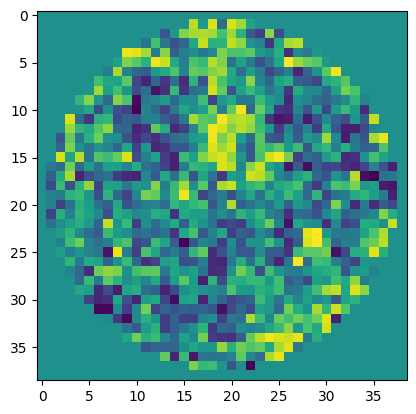

In [21]:
plt.imshow(MS[1,:,:])

## UMAP

In [37]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

2025-05-31 15:47:08.196720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748706428.410482      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748706428.469406      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [38]:
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i]#.reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

In [39]:
red_ = UMAP(n_components = 2, n_neighbors = 20,#round(0.05*np.sqrt(X_.shape[0])),
            min_dist =0.1,random_state=123)

Z = MinMaxScaler().fit_transform(red_.fit_transform(MinMaxScaler().fit_transform(MS.reshape(MS.shape[0],-1))))

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [42]:
ind_ = np.random.randint(0,MS.shape[0],3000)
len(ind_)

3000

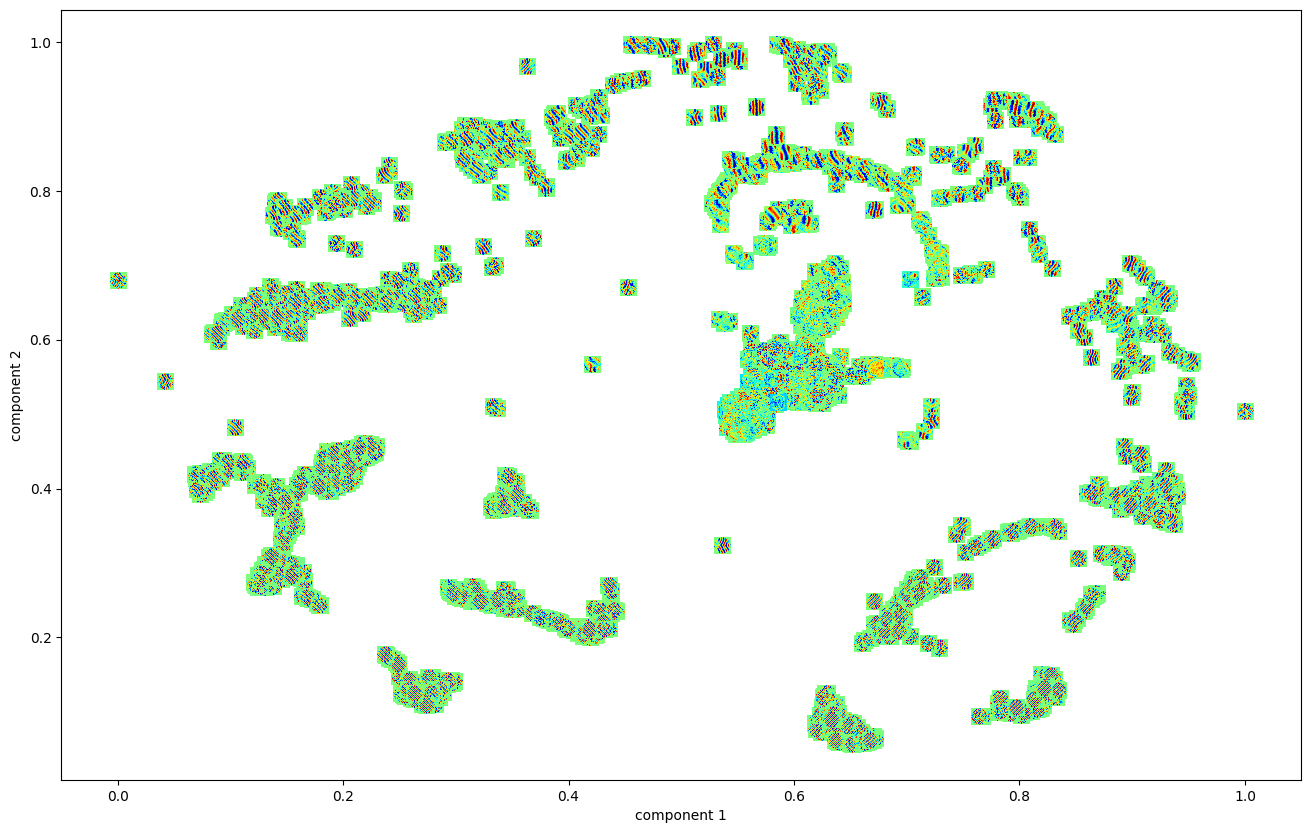

In [43]:
plot_mnist_2d(Z[ind_],np.array(T)[ind_],MS[ind_,:,:],img_w=42,img_h=42,zoom=0.3,cmap='jet')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

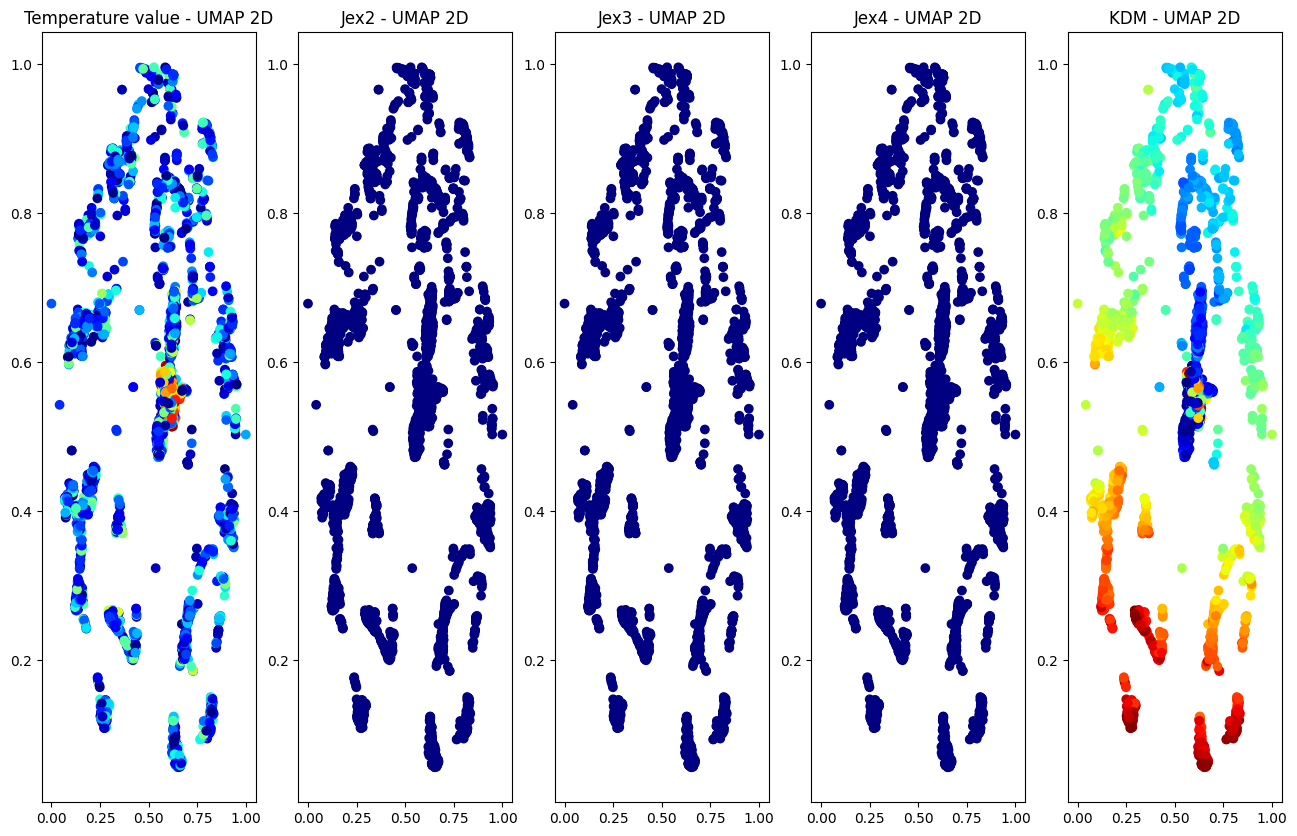

In [44]:
fig,ax = plt.subplots(1,5,figsize=(16,10))
ax[0].scatter(Z[ind_,0],Z[ind_,1],c=np.array(T)[ind_],cmap='jet')
ax[0].set_title('Temperature value - UMAP 2D')
ax[1].scatter(Z[ind_,0],Z[ind_,1],c=np.array(Jex2)[ind_],cmap='jet')
ax[1].set_title('Jex2 - UMAP 2D')
ax[2].scatter(Z[ind_,0],Z[ind_,1],c=np.array(Jex3)[ind_],cmap='jet')
ax[2].set_title('Jex3 - UMAP 2D')
ax[3].scatter(Z[ind_,0],Z[ind_,1],c=np.array(Jex4)[ind_],cmap='jet')
ax[3].set_title('Jex4 - UMAP 2D')
ax[4].scatter(Z[ind_,0],Z[ind_,1],c=np.array(KDM)[ind_],cmap='jet')
ax[4].set_title('KDM - UMAP 2D')
plt.show()

## ACTUALIZAMOS LA OTRA BASE DE DATOS EN KAGGLE

In [26]:
!mkdir -p /root/.config/kaggle
!cp /kaggle/input/kaggle/kaggle.json /root/.config/kaggle/
!chmod 600 /root/.config/kaggle/kaggle.json

In [27]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [29]:
api = KaggleApi()

In [30]:
!kaggle datasets init -p /kaggle/working

Data package template written to: /kaggle/working/dataset-metadata.json


In [31]:
import json

# Ruta del archivo de metadatos
metadata_file = '/kaggle/working/dataset-metadata.json'

# Leer el archivo de metadatos generado
with open(metadata_file, 'r') as f:
    metadata = json.load(f)

# Modificar los valores
metadata['title'] = 'KDM DATABASE SPINERS'  # Título del dataset
metadata['id'] = 'deathperminut/kdm-database-spiners'  # Cambia 'your_username' por tu usuario de Kaggle
metadata['licenses'] = [{'name': 'CC0-1.0'}]  # Licencia pública

# Guardar los cambios
with open(metadata_file, 'w') as f:
    json.dump(metadata, f)

In [32]:
import numpy as np

# Guardar los arreglos en un archivo NumPy
output_npy = '/kaggle/working/data.npy'
np.savez(
    output_npy,
    Nest=Nest, L=L, rd=rd, So=So, T=T, Jex=Jex, Jex2=Jex2,
    Jex3=Jex3, Jex4=Jex4, Kan1=Kan1, KanS=KanS,
    Hex=Hex, kd=kd, KDM=KDM,MS=MS
)

print(f"Archivo NumPy guardado en: {output_npy}")

Archivo NumPy guardado en: /kaggle/working/data.npy


In [36]:
!kaggle datasets version -p /kaggle/working -m "Updated dataset with new information" --delete-old-versions

Skipping folder: .virtual_documents; use '--dir-mode' to upload folders
Starting upload for file data.npy.npz
Error while trying to load upload info: ApiStartBlobUploadRequest.__init__() got an unexpected keyword argument 'type'
100%|██████████████████████████████████████| 1.88G/1.88G [01:04<00:00, 31.5MB/s]
Upload successful: data.npy.npz (2GB)
Dataset version is being created. Please check progress at https://www.kaggle.com/deathperminut/kdm-database-spiners
